# Ninth Session of Stochastic Modelling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/NinthSession.ipynb)

## A very fast recap on convergence on DTMC + convergence of CTMC

Remember that from a DTMC the number of steady states distribution and the convergence of a DTMC is completely determined by it's eigenvalues.

$$\begin{array}{ |c|c|c| } 
 \hline
  & \{i \text{ s.t } \lambda_{i}\neq 1 \wedge ||\lambda_{i}||_{2}=1  \}|=0 & \{i \text{ s.t } \lambda_{i}\neq 1 \wedge ||\lambda_{i}||_{2}=1  \}|>0 \\
 \hline
 |\{i \text{ s.t } \lambda_{i}=1 \}|=1 & \text{Unique steady state (with convergence)} & \text{Unique steady state (no convergence)} \\
 \hline
 |\{i \text{ s.t } \lambda_{i}=1 \}|>1 & \text{Infinite number of steady states (with convergence)} & \text{Infinite number of steady states (no convergence)} \\ 
 \hline
\end{array}$$

Notice that for a CTMC of rate matrix $Q$ if we define $\gamma=\max_{i}-q_{ii}$ we have that $$P=I+\frac{Q}{\gamma}$$:
- has all the rows that sum to 1
- $p_{ij}=1+\frac{q_{ij}}{\gamma}>1+(-1)\ge 0$

So $P$ is a stochastic matrix and defines a DTMC.
Also basic linear algebra tells us that $\lambda_{Q}=\gamma(\lambda_{P}-1)$.
As we know that the $||\lambda_p||\le 1$, this tells us two facts:
- if $\lambda_{p}\neq 1 $ then $Re(\lambda_{Q})=Re(\gamma(\lambda_{P}-1))=Re(\lambda_{P}-1)=Re(\lambda_{P})-1<0$
- if $\lambda_{p}=1$ then $\lambda_{Q}=0$

Also rescaling and adding identity matrix preserves the eigenspaces. So we can prove in a similar way to what we have done in Lab 4 that:

***The probability of a CTMC always converges***

Regarding the number of steady state of a CTMC:
- If there is only one eigenvalue of value 0, then there is only one steady state
- If there are more then one eigenvalues of value 0, then there are an infinite number of steady states

## Population Continous time markov models


A population CTMC model is a tuple $\mathcal{X}=\left(\mathbf{X}, \mathcal{D}, \mathcal{T}, \mathbf{x}_0\right)$, where:
- $\mathbf{X}$ - vector of variables counting how many individuals in each state.
- $\mathcal{D}$ state space.
- $\mathbf{x}_0 \in \mathcal{D}$ is the initial state.
- $\eta_i \in \mathcal{T}$ - global transitions: $\eta_i=(a, \mathbf{v}, r(\mathbf{X}))$
  - a-event name (optional).
  - $\mathbf{v} \in \mathbb{R}^n$ - update vector (from $\mathbf{X}$ to $\mathbf{X}+\mathbf{v}$ )
  - $r: \mathcal{D} \rightarrow \mathbb{R}_{\geq 0}$ - rate function.
  
Example:
People exiting from the DEUX because it is being closed. Only two states: in the deux (state A), outside the deux (state B). Let's also suppose that the rate of exiting is proportional to $A$.
We should write $$ A\rightarrow B,\quad k_{1}*A$$ or by using the definition
$$(AtoB,(-1,1),k_{1}*A)$$

There are two ways to simulate these models that you have seen:
- compute the mean field approximation and use the ode (only if the system can be normalizable)
- solve using gillespie

There is a package called tellurium that permits to do both of this things very easy.

Let's suppose $A_{0}=100, B_{0}=0$, $k_{1}=0.1$

In [2]:
!apt-get install libncurses5
!pip install -q tellurium==2.2.8
##NOW RESTART THE RUNTIME

E: Impossibile aprire il file di blocco /var/lib/dpkg/lock-frontend - open (13: Permesso negato)
E: Impossibile acquisire il blocco sul frontend dpkg (/var/lib/dpkg/lock-frontend). È necessario essere root.


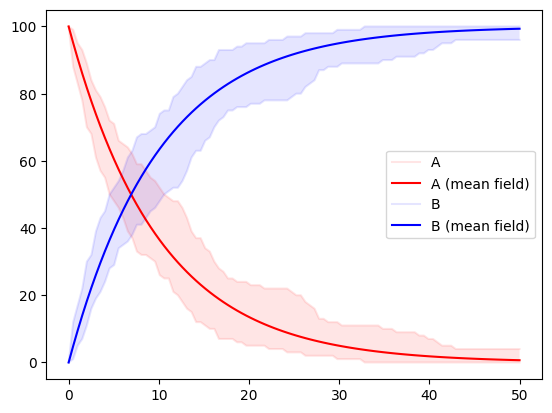

In [3]:
#ctmc
import numpy as np
import tellurium as te
import matplotlib.pyplot as plt
num_samples=500
num_steps=100
maxtime=50
color=["red","blue"]

model='A -> B; k1*A; k1 = 0.1; A = 100'


def solver_plotter(model,color,num_samples,num_steps,maxtime):
    r = te.loada(model)
    r.integrator = 'gillespie'
    r.integrator.seed = 1234
    r.integrator.variable_step_size = False
    names=["time"]+r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()
    num_steps=100
    s_sim=np.zeros((num_samples,num_steps,len(names)))


    for k in range(num_samples):
        r.resetToOrigin()
        s_sim[k] = r.simulate(0, maxtime,num_steps)

    r = te.loada(model)
    s=r.simulate(0, maxtime, num_steps)

    
    s_min=np.min(s_sim,axis=0)
    s_max=np.max(s_sim,axis=0)
    for i in range(1,len(names)):
        plt.plot(s_min[:,0],s_min[:,i], alpha=0.1,color=color[i-1])
        plt.plot(s_max[:,0],s_max[:,i], alpha=0.1,color=color[i-1],label=names[i])
        plt.fill_between(s_min[:,0],s_min[:,i],s_max[:,i],alpha=0.1,facecolor=color[i-1])
        plt.plot(s[:,0],s[:,i],color=color[i-1],label=names[i]+" (mean field)")

    plt.legend()
    plt.show()
    return s, s_sim

a,b=solver_plotter(model,color,num_steps,num_samples,maxtime)


### Exercise
Implement and plot the sir model
- $S+I\rightarrow I+I, \beta*S*I/N$
- $I\rightarrow R, \alpha*I$

Suppose $I_{0}=1$, $S_{0}=99$, $N=100$, $R_{0}=0$, $\alpha=0.1$, $\beta=0.1$
 
### Solution

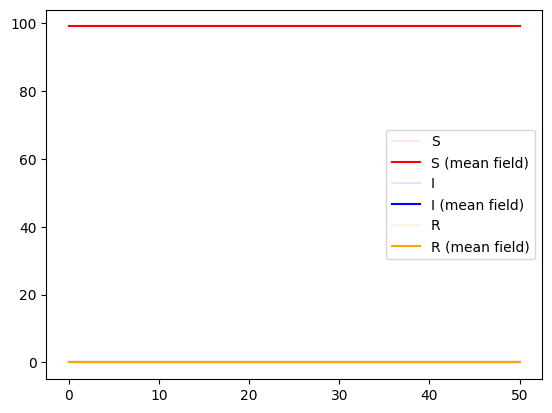

In [5]:
model='S+I -> I+I; beta*I*S/N; I -> R; alpha*I; alpha = 0.1; beta = 0.1; N = 100; S=99; I=0'
color=["red","blue","orange"]
a,b=solver_plotter(model,color,num_steps,num_samples,maxtime)
